In [1]:
import numpy as np
import pandas as pd
import time

Dataset

In [2]:
# X_train = pd.read_csv('dataset/X_train.csv', header=None)
# Y_train = pd.read_csv('dataset/Y_train.csv', header=None)
# X_test = pd.read_csv('dataset/X_test.csv', header=None)
# Y_test = pd.read_csv('dataset/Y_test.csv', header=None)
X_train = pd.read_csv("dataset/x-train-big-data.csv",header=None)
Y_train = pd.read_csv("dataset/y-train-big-data.csv",header=None)
X_test = pd.read_csv("dataset/x-test-big-data.csv",header=None)
Y_test = pd.read_csv("dataset/y-test-big-data.csv",header=None)

In [3]:
X_train = X_train.values
Y_train = Y_train.values
X_test = X_test.values
Y_test = Y_test.values


In [4]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(9998, 14)
(9998, 1)
(131, 14)
(131, 1)


Linear Regression

In [5]:
def predict(X, coefficients):
    # Thêm cột 1 vào ma trận X để tính toán hệ số tự do
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Tính toán giá trị dự đoán
    y_pred = np.dot(X, coefficients)

    return y_pred

In [6]:
def model(X, y):
    n_samples, n_features = X.shape

    # Tạo ma trận thiết kế (design matrix)
    X = np.hstack((np.ones((n_samples, 1)), X))  # Thêm cột 1 cho hệ số tự do

    # Giải hệ phương trình tuyến tính bằng phương pháp bình phương nhỏ nhất
    coefficients = np.linalg.lstsq(X, y, rcond=None)[0]

    return coefficients

Cutoff Point

In [7]:
# Tìm các hệ số
coefficients = model(X_train, Y_train)
print("Các hệ số: \n",coefficients)

# Dự đoán kết quả trên tập huấn luyện
y_pred_train = predict(X_train, coefficients)
print("Kết quả dự đoán trên tập huấn luyện: \n", y_pred_train)

Các hệ số: 
 [[-6.14445636e+00]
 [-9.79939969e-02]
 [ 1.32427232e-01]
 [ 1.06244479e+00]
 [-8.23056244e-01]
 [ 6.26427869e-03]
 [ 1.47865935e-03]
 [ 3.22049137e-03]
 [-5.99640524e-03]
 [ 1.35911172e-01]
 [ 3.15872636e-01]
 [-3.19170602e-02]
 [-3.50148859e-01]
 [-3.29808829e-05]
 [ 1.84587097e-01]]
Kết quả dự đoán trên tập huấn luyện: 
 [[0.80979811]
 [0.80751999]
 [0.6663024 ]
 ...
 [0.17612319]
 [0.18024535]
 [0.17204585]]


In [8]:
classes = np.unique(Y_train)
classes

array([0, 1, 2, 3])

In [9]:
means = [y_pred_train[(Y_train == i)].mean() for i in range(len(classes))]
n_samples = [np.sum(Y_train == i) for i in range(len(classes))]
cutoffs = [(means[i]*n_samples[i] + means[i+1]*n_samples[i+1]) / (n_samples[i] + n_samples[i+1])\
            for i in range(len(classes)-1)]

means = np.array(means)
cutoffs = np.array(cutoffs)

print("Chỉ số means: \n",means)
print("Ngưỡng phân lớp cutoffs: \n",cutoffs)

Chỉ số means: 
 [0.03376974 1.01486108 2.00583066 2.5680943 ]
Ngưỡng phân lớp cutoffs: 
 [0.08513815 1.60197053 2.28844547]


Classification

In [10]:
# Dự đoán giá trị dựa vào tập kiểm thử
y_pred = predict(X_test, coefficients)
print("Kết quả dự đoán: \n",y_pred)

Kết quả dự đoán: 
 [[2.98905811]
 [2.80554178]
 [2.83074116]
 [2.80198262]
 [2.88716723]
 [2.84433251]
 [1.50344164]
 [1.4662957 ]
 [1.44138955]
 [1.40755545]
 [1.33613143]
 [1.2711213 ]
 [1.2435074 ]
 [1.32404232]
 [1.31986369]
 [1.31587959]
 [1.32529894]
 [1.28286014]
 [1.26079933]
 [1.37899676]
 [1.3355761 ]
 [1.38973395]
 [1.45112417]
 [1.63032304]
 [1.52518382]
 [1.52356865]
 [1.81550856]
 [1.57912334]
 [1.77691973]
 [1.7521092 ]
 [1.79320507]
 [2.7159707 ]
 [4.08011765]
 [2.86982939]
 [2.98830061]
 [2.88839691]
 [3.06093536]
 [2.95333155]
 [2.97927654]
 [2.74552877]
 [2.72560613]
 [2.86814623]
 [2.66829871]
 [2.61502302]
 [2.63916883]
 [2.560154  ]
 [2.60073434]
 [2.6337952 ]
 [2.63267113]
 [2.66130259]
 [2.69267166]
 [2.60950736]
 [2.64709689]
 [2.50259987]
 [2.68290381]
 [2.58850772]
 [2.74824375]
 [2.76586066]
 [2.8387937 ]
 [2.83661852]
 [2.9916601 ]
 [2.86898319]
 [2.94758667]
 [2.96214564]
 [2.99770016]
 [3.01832222]
 [2.90046508]
 [2.99474707]
 [3.00308159]
 [2.90777718]
 

In [11]:
Y_test = Y_test.ravel()
y_pred = y_pred.ravel()

In [12]:
y_pred = np.where(y_pred < cutoffs[0], 0, np.where(y_pred < cutoffs[1], 1, 2))
print("Kết quả dự đoán sau khi phân lớp: \n",y_pred)

Kết quả dự đoán sau khi phân lớp: 
 [2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 1 1 1 1 1]


Evaluation

In [13]:
def my_confusion_matrix(y_true, y_pred):
    N = np.unique(y_true).shape[0] # number of classes 
    cm = np.zeros((N, N))
    for n in range(y_true.shape[0]):
        cm[y_true[n], y_pred[n]] += 1
    return cm 

In [14]:
start_time = time.time()
# Tính confusion matrix
confusion_matrix = my_confusion_matrix(Y_test, y_pred)

# Tính accuracy và error rate
accuracy = np.diagonal(confusion_matrix).sum()/confusion_matrix.sum()   
error_rate = 1 - accuracy

# Tính precision, recall, specificity, f1-score 
N = confusion_matrix.shape[0] # Số lượng lớp
   
total_samples = np.sum(confusion_matrix) # Tính tổng số mẫu

# Khởi tạo các mảng để lưu các chỉ số của từng lớp
precision = []
recall = []
specificity = []
f_score = []

for i in range(N):
    # TP, FP, FN, TN cho lớp i
    TP = confusion_matrix[i, i]
    FP = sum(confusion_matrix[j, i] for j in range(N) if j != i)
    FN = sum(confusion_matrix[i, j] for j in range(N) if j != i)
    TN = total_samples - (TP + FP + FN)
    
    # Precision, Recall, Specificity, F1-score cho lớp i
    precision_i = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall_i = TP / (TP + FN) if (TP + FN) > 0 else 0
    specificity_i = TN / (TN + FP) if (TN + FP) > 0 else 0
    f_score_i = 2 * (precision_i * recall_i) / (precision_i + recall_i) if (precision_i + recall_i) > 0 else 0

    # Thêm vào danh sách
    precision.append(precision_i)
    recall.append(recall_i)
    specificity.append(specificity_i)
    f_score.append(f_score_i)
end_time = time.time()
time_manual = end_time - start_time
print("Thời gian chạy: ", time_manual)


Thời gian chạy:  0.002000093460083008


In [15]:
# In kết quả
print('Confusion matrix:')
print(confusion_matrix)
print("Specificity \t:",np.array(specificity))

print('Accuracy\t:', accuracy)
print('Error rate\t:', error_rate)
print("Precision\t:",np.array(precision))
print("Recall\t\t:",np.array(recall))
print("F-score \t:",np.array(f_score))

Confusion matrix:
[[ 0. 10.  1.  0.]
 [ 0.  5.  0.  0.]
 [ 0.  0. 88.  0.]
 [ 0. 20.  7.  0.]]
Specificity 	: [1.         0.76190476 0.81395349 1.        ]
Accuracy	: 0.7099236641221374
Error rate	: 0.29007633587786263
Precision	: [0.         0.14285714 0.91666667 0.        ]
Recall		: [0. 1. 1. 0.]
F-score 	: [0.         0.25       0.95652174 0.        ]


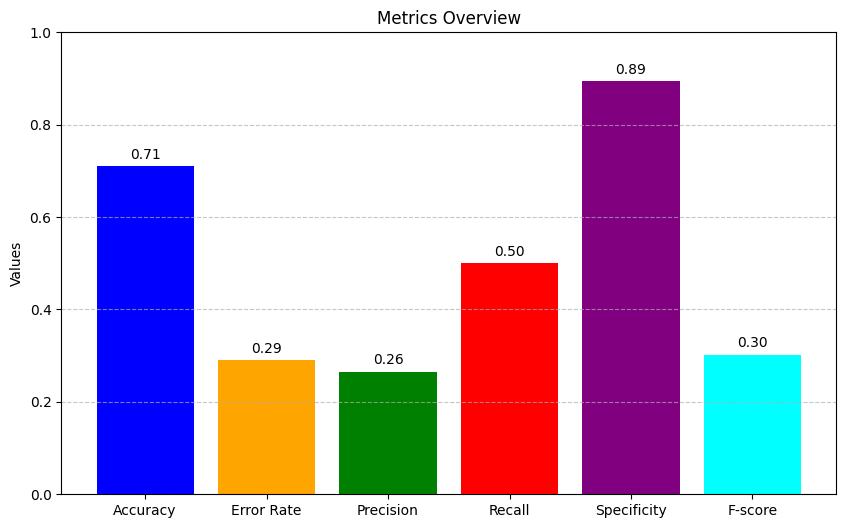

In [16]:
import matplotlib.pyplot as plt
# Chuẩn bị dữ liệu để vẽ
metrics = ['Accuracy', 'Error Rate', 'Precision', 'Recall', 'Specificity', 'F-score']
values = [
    accuracy,
    error_rate,
    np.mean(precision),
    np.mean(recall),
    np.mean(specificity),
    np.mean(f_score)
]

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])

# Hiển thị giá trị trên các thanh
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Cài đặt biểu đồ
plt.title("Metrics Overview")
plt.ylabel("Values")
plt.ylim(0, 1)  # Vì các giá trị từ 0 đến 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [17]:
import matplotlib.pyplot as plt

Sklearn

In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score ,f1_score

start_time = time.time()
confusion_matrix = confusion_matrix(Y_test, y_pred)
accuracy_lib = accuracy_score(Y_test, y_pred)
error_rate_lib = 1 - accuracy
precision_score_lib = precision_score(Y_test, y_pred, average=None)
recall_score_lib = recall_score(Y_test, y_pred, average=None)

end_time = time.time()
f_score_lib = f1_score(Y_test, y_pred, average=None)
time_sklearn= end_time - start_time
print("Thời gian chạy: ",time_sklearn)

# In kết quả
print('Confusion matrix:')
print(confusion_matrix)

print('\nAccuracy\t:', accuracy_lib)
print('Error-rate\t:', error_rate_lib)
print('Precision\t:', precision_score_lib)
print('Recall\t\t:', recall_score_lib)
print('F-score\t\t:', f_score_lib)

Thời gian chạy:  0.0060939788818359375
Confusion matrix:
[[ 0 10  1  0]
 [ 0  5  0  0]
 [ 0  0 88  0]
 [ 0 20  7  0]]

Accuracy	: 0.7099236641221374
Error-rate	: 0.29007633587786263
Precision	: [0.         0.14285714 0.91666667 0.        ]
Recall		: [0. 1. 1. 0.]
F-score		: [0.         0.25       0.95652174 0.        ]


c:\Users\MSI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
import matplotlib.pyplot as plt

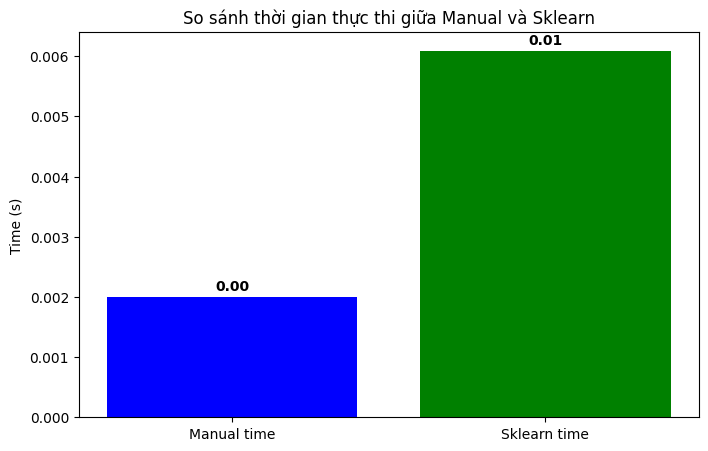

In [20]:
# Tạo dữ liệu cho biểu đồ
scores = [time_manual, time_sklearn]
labels = ['Manual time', 'Sklearn time']# Vẽ biểu đồ cột

plt.figure(figsize=(8, 5))
plt.bar(labels, scores, color=['blue', 'green'])
plt.ylabel('Time (s)')
plt.title('So sánh thời gian thực thi giữa Manual và Sklearn')

# Hiển thị giá trị trên mỗi cột
for i, v in enumerate(scores):
    plt.text(i, v + 0.0001, f"{v:.2f}", ha='center', fontweight='bold')

plt.show()

In [21]:
group1_values = [
    accuracy,
    error_rate,
    np.mean(precision),
    np.mean(recall),
    np.mean(f_score)
]

group2_values = [
    accuracy_lib,
    error_rate_lib,
    np.mean(precision_score_lib),
    np.mean(recall_score_lib),
    np.mean(f_score_lib)
]

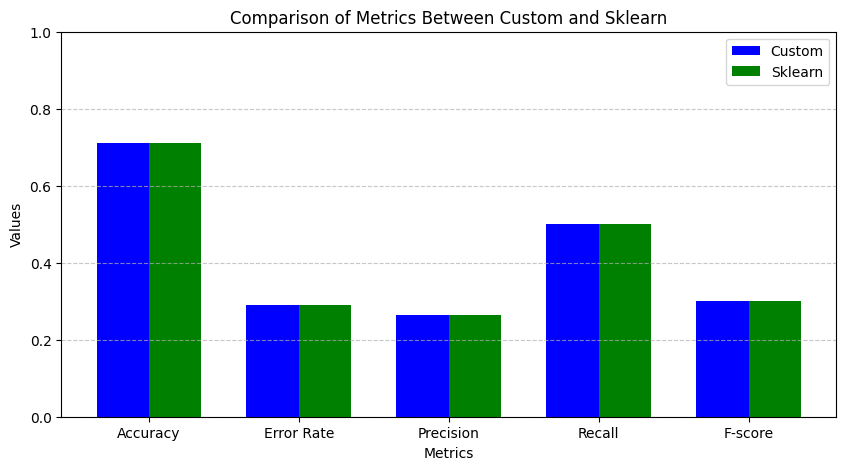

In [22]:
# Tổng hợp dữ liệu để vẽ
metrics = ['Accuracy', 'Error Rate', 'Precision', 'Recall', 'F-score']
# Vẽ biểu đồ
x = np.arange(len(metrics))  # Vị trí trên trục x
bar_width = 0.35  # Độ rộng của từng cột

plt.figure(figsize=(10, 5))

# Vẽ các cột cho nhóm 1
plt.bar(x - bar_width/2, group1_values, bar_width, label='Custom', color='blue')

# Vẽ các cột cho nhóm 2
plt.bar(x + bar_width/2, group2_values, bar_width, label='Sklearn', color='green')

# Cài đặt biểu đồ
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Comparison of Metrics Between Custom and Sklearn')
plt.xticks(x, metrics)  # Gắn nhãn trục x
plt.ylim(0, 1)  # Giới hạn từ 0 đến 1 vì các giá trị đều trong khoảng này
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.show()